In [ ]:
import pandas as pd 
import numpy as np
import os


In [95]:
file_path = r'C:\Users\navya\downloads\train.xlsx'
df = pd.read_excel(file_path,index_col='id',parse_dates=['date'])
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9117000170,2015-05-05,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
6700390210,2014-07-08,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
7212660540,2015-01-15,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
8562780200,2015-04-27,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
7760400350,2014-12-05,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16209 entries, 9117000170 to 6147650280
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           16209 non-null  datetime64[ns]
 1   price          16209 non-null  int64         
 2   bedrooms       16209 non-null  int64         
 3   bathrooms      16209 non-null  float64       
 4   sqft_living    16209 non-null  int64         
 5   sqft_lot       16209 non-null  int64         
 6   floors         16209 non-null  float64       
 7   waterfront     16209 non-null  int64         
 8   view           16209 non-null  int64         
 9   condition      16209 non-null  int64         
 10  grade          16209 non-null  int64         
 11  sqft_above     16209 non-null  int64         
 12  sqft_basement  16209 non-null  int64         
 13  yr_built       16209 non-null  int64         
 14  yr_renovated   16209 non-null  int64         
 15  zipcode   

In [89]:
df.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,0.004310,-0.014758,-0.026319,-0.025651,0.008589,-0.023080,-0.001790,-0.002858,-0.051778,-0.031094,-0.019975,-0.015618,-0.000803,-0.027498,0.001099,-0.029040,-0.003658,-0.023130,0.003097
price,0.004310,1.000000,0.304454,0.525487,0.700933,0.088526,0.251428,0.245221,0.390534,0.031333,0.664266,0.602648,0.320301,0.048307,0.133075,-0.054517,0.310008,0.024279,0.581781,0.076060
bedrooms,-0.014758,0.304454,1.000000,0.512658,0.571198,0.031288,0.172445,-0.013955,0.067256,0.026111,0.351477,0.471797,0.297196,0.148644,0.020143,-0.154518,-0.015274,0.126862,0.383391,0.024100
bathrooms,-0.026319,0.525487,0.512658,1.000000,0.751945,0.083157,0.504068,0.055692,0.177566,-0.127073,0.664627,0.683100,0.275047,0.503787,0.052243,-0.203460,0.024899,0.222711,0.563793,0.075934
sqft_living,-0.025651,0.700933,0.571198,0.751945,1.000000,0.172949,0.348418,0.088843,0.274416,-0.060182,0.760925,0.875830,0.426891,0.315132,0.056486,-0.204425,0.052008,0.244083,0.754931,0.172654
sqft_lot,0.008589,0.088526,0.031288,0.083157,0.172949,1.000000,-0.005568,0.026972,0.061824,-0.012143,0.113591,0.183068,0.014630,0.049967,0.017512,-0.136081,-0.082422,0.245868,0.155903,0.720981
floors,-0.023080,0.251428,0.172445,0.504068,0.348418,-0.005568,1.000000,0.014519,0.024111,-0.269722,0.457886,0.518404,-0.250838,0.498043,0.006272,-0.058061,0.051718,0.125464,0.271569,-0.013306
waterfront,-0.001790,0.245221,-0.013955,0.055692,0.088843,0.026972,0.014519,1.000000,0.383340,0.019247,0.060923,0.057471,0.076038,-0.037142,0.090072,0.027807,-0.016475,-0.041775,0.071691,0.033118
view,-0.002858,0.390534,0.067256,0.177566,0.274416,0.061824,0.024111,0.383340,1.000000,0.048312,0.242506,0.157919,0.271584,-0.059378,0.100235,0.086064,0.003694,-0.085159,0.277348,0.064485
condition,-0.051778,0.031333,0.026111,-0.127073,-0.060182,-0.012143,-0.269722,0.019247,0.048312,1.000000,-0.146829,-0.160184,0.175689,-0.362723,-0.058913,0.004477,-0.022307,-0.111264,-0.096368,-0.008104


In [81]:
%pip install ydata-profiling pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [15]:
from ydata_profiling import ProfileReport
save_path = r'C:\Users\navya\Downloads\final_report.html'
print(f"Saving report to: {save_path}...")
profile = ProfileReport(df, title="Train Data Profiling Report")
output_filename = 'final_report.html'
profile.to_file(save_path)

Saving report to: C:\Users\navya\Downloads\final_report.html...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 71.20it/s]
c:\Users\navya\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:87: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
current_year = df['date'].dt.year.max()
df['house_age'] = current_year - df['yr_built']
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
X=df.drop(columns=['price','zipcode','date','yr_built','yr_renovated'],axis=1)
y=df['price']


In [122]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated
id,,,,,,,,,,,,,,,,,
9117000170,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660,9240,54,0
6700390210,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720,3605,23,0
7212660540,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870,7455,21,0
8562780200,2,2.25,1240,705,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240,750,6,0
7760400350,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590,8071,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5272200045,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000,6947,68,0
9578500790,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927,5183,1,0
7202350480,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690,2650,11,0


In [123]:
y

id
9117000170    268643
6700390210    245000
7212660540    200000
8562780200    352499
7760400350    232000
               ...  
5272200045    378000
9578500790    399950
7202350480    575000
1723049033    245000
6147650280    315000
Name: price, Length: 16209, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

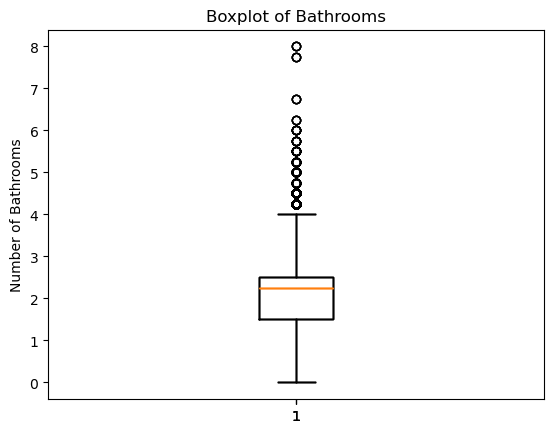

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(X_train['bathrooms'])
plt.title("Boxplot of Bathrooms")
plt.ylabel("Number of Bathrooms")
plt.show()

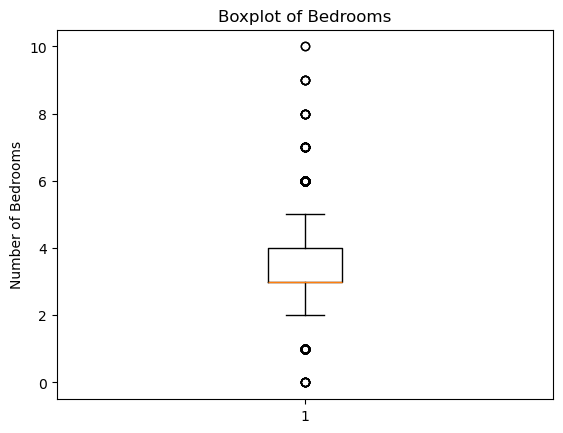

In [156]:

plt.boxplot(X_train['bedrooms'])
plt.title("Boxplot of Bedrooms")
plt.ylabel("Number of Bedrooms")
plt.show()

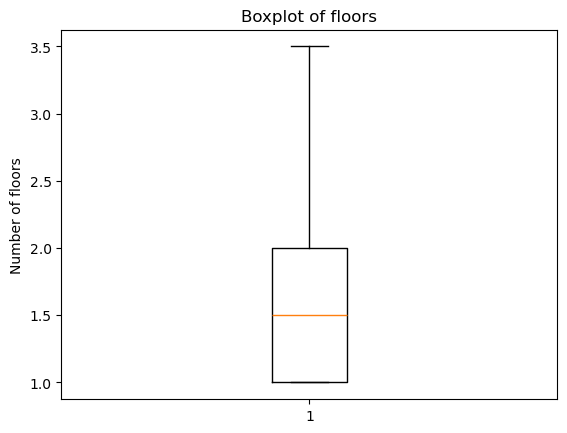

In [159]:
plt.boxplot(X_train['floors'])
plt.title("Boxplot of floors")
plt.ylabel("Number of floors")
plt.show()

In [147]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit on Training data, then Transform it
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform on Test data
X_test_scaled = scaler.transform(X_test)

#4. Convert back to pandas dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [148]:
X_train_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated
0,-0.405066,-1.449423,-0.939795,-0.211270,-0.915945,-0.082187,-0.304796,-0.625740,-1.410386,-0.686870,-0.652980,-0.222477,2.772476,-1.297261,-0.227058,0.450916,-0.211060
1,-1.514121,-0.145234,-0.070323,-0.281639,0.007621,-0.082187,-0.304796,-0.625740,-0.558174,-0.409039,0.628832,-0.007498,-0.724742,-0.477714,-0.297626,1.680129,4.737981
2,0.703990,0.506861,0.546012,-0.176625,0.931187,-0.082187,-0.304796,-0.625740,1.146251,0.943875,-0.652980,0.554756,1.066865,1.132112,-0.217432,-0.914877,-0.211060
3,0.703990,0.180813,0.733114,-0.092197,-0.915945,-0.082187,2.340642,2.454152,1.998464,0.231179,1.086622,1.086093,-0.459584,1.176016,-0.103039,0.621640,-0.211060
4,0.703990,4.093380,3.484610,7.679681,0.931187,-0.082187,2.340642,-0.625740,1.998464,4.169125,-0.652980,-0.001027,2.213494,-0.082575,2.024745,-1.188035,-0.211060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,0.703990,0.180813,0.237845,0.650989,-0.915945,-0.082187,3.663361,0.914206,0.294039,-0.288243,1.040843,0.398015,0.794541,1.176016,0.260620,0.382626,-0.211060
12963,0.703990,0.506861,1.756670,-0.201228,0.931187,-0.082187,-0.304796,-0.625740,1.998464,2.272630,-0.652980,0.178003,0.959369,2.478511,-0.196768,-1.153890,-0.211060
12964,-0.405066,-1.449423,-1.038849,-0.063150,0.007621,-0.082187,-0.304796,-0.625740,-0.558174,-0.795586,-0.652980,-0.082992,-0.387920,0.429642,-0.149252,0.587495,-0.211060
12965,-0.405066,0.180813,-0.873760,-0.347164,0.931187,-0.082187,-0.304796,-0.625740,0.294039,-0.855984,-0.195190,0.751041,-1.104563,-1.033835,-0.405070,-1.256325,-0.211060
